In [1]:
import pickle
import numpy as np
import networkx as nx
import pandas as pd
import brainmaptools as brainmap
import matplotlib.pyplot as plt
import community
import brainx.modularity as mod
import operator
%matplotlib inline
import csv
import scipy as scipy
import scipy.io as io
import My_functions as myfunctions
import progressbar as pb
import time
import os
%load_ext Cython
import bct
from numba import jit

/Users/owner/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/brainx/__init__.py:30: UserWarning: Monkeypatching NetworkX's Watts-Strogatz routine
  warnings.warn("Monkeypatching NetworkX's Watts-Strogatz routine")


In [2]:
domains= ['Memory', 'Working Memory', 'Emotion', 'Attention', 'Language', 'Vision', 'Audition', 'Base', 'Rest']

In [3]:
relabel_dict_file='/Users/owner/Functional_Connectivity/Scripts/Label_dict.pck'
relabel_dict=pickle.load(open(relabel_dict_file,"rb"))

In [4]:
G_nothresh={}
for x in domains:
    filename='G_nothresh_jaccard_'+x+'_.pck'
    workdir='/Users/owner/Functional_Connectivity/Results/G_jaccard_graphs/Unthresholded_G_jaccard/'
    output=workdir+filename
    G_nothresh[x]=pickle.load(open (output, 'rb'))

# BCTPY Newman

In [5]:
bct_mod={}
bct_part={}
bct_partition={}
for x in domains:
    bct_mod[x]=bct.modularity_und(np.squeeze(np.asarray(nx.to_numpy_matrix(G_nothresh[x]))))
    bct_part[x]=dict(zip(G_nothresh[x].nodes(), bct_mod[x][0]))
    bct_partition[x]=brainmap.make_brainx_style_partition(bct_part[x])

In [6]:
for x in domains:
    print x, '|', bct_mod[x][1]

Memory | 0.175464615461
Working Memory | 0.222097379566
Emotion | 0.162290264322
Attention | 0.189318595584
Language | 0.248974168101
Vision | 0.302636385616
Audition | 0.436937697958
Base | 0.165184025669
Rest | 0.519053198028


Mutual Information Matrix

/Users/owner/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/brainx/modularity.py:1004: RuntimeWarning: divide by zero encountered in log
  num = nansum(N*log(N*nn/(nsum_row*nsum_col)))
/Users/owner/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/brainx/modularity.py:1004: RuntimeWarning: invalid value encountered in multiply
  num = nansum(N*log(N*nn/(nsum_row*nsum_col)))
/Users/owner/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/brainx/modularity.py:1004: RuntimeWarning: invalid value encountered in divide
  num = nansum(N*log(N*nn/(nsum_row*nsum_col)))
/Users/owner/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/brainx/modularity.py:1005: RuntimeWarning: divide by zero encountered in log
  den = nansum(nsum_row*log(nsum_row/nn)) + nansum(nsum_col*log(nsum_col/nn))
/Users/owner/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/brainx/modularity.py:1005: RuntimeWarning: invalid value encountered in multipl

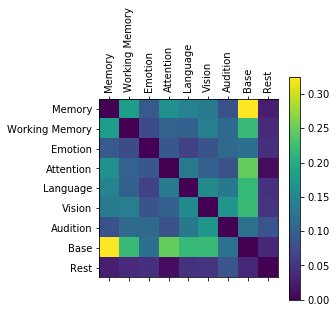

In [7]:
mutual_matrix_bct_new=np.zeros([len(domains),len(domains)])
for x,y in enumerate(domains):
    for a,b in enumerate(domains):
        mutual_matrix_bct_new[x][a]=mod.mutual_information(bct_partition[y],bct_partition[b])
np.fill_diagonal(mutual_matrix_bct_new,0)
plt.matshow(mutual_matrix_bct_new)        
plt.xticks(range(len(domains)), domains, rotation='90')
plt.yticks(range(len(domains)), domains)
plt.colorbar()


Statistical Significance

In [ ]:
bct_rand_mod_list=pickle.load(open('/Users/owner/Functional_Connectivity/Scripts/bct_rand_mod_list.pck', 'rb'))

In [ ]:
mean={}
std={}
z={}
for x in domains:
    mean[x]=np.mean(bct_rand_mod_list[x])
    std[x]=np.std(bct_rand_mod_list[x])
    z[x]=((bct_mod[x][1]-mean[x])/std[x])
    if z[x] > 1.96:
        print x, '| Q =', bct_mod[x][1], '| Z =', z[x], '| M =', mean[x]

Save Partition as BrainNet File

In [ ]:
for x in domains:
    myfunctions.node_file(bct_part[x], y=basic_metrics[x]['between_cent'], filename='bct_nothresh_'+x+'_node.csv')
    csv_file = '/Users/owner/Desktop/BrainImagingViewer/BrainNetViewer_20171031/Data/NodeFiles/bct_nothresh_'+x+'_node.csv'
    txt_file = '/Users/owner/Desktop/BrainImagingViewer/BrainNetViewer_20171031/Data/NodeFiles/Nothresh/bct_nothresh_'+x+'_node.node'
    with open(txt_file, "w") as my_output_file:
        with open(csv_file, "r") as my_input_file:
            [ my_output_file.write(" ".join(row)+'\n') for row in csv.reader(my_input_file)]
        my_output_file.close()

# Louvain

Remove Weight Attribute

In [ ]:
G_noweight={x: brainmap.remove_weight_edge_attribute(G_nothresh[x]) for x in domains }

In [ ]:
Louvain_part={}
Dendogram={}
G_part={}
for x in domains:
    #G_part[x]=community.best_partition(G_nothresh[x])
    #Dendogram[x]=community.generate_dendrogram(G_nothresh[x])
    workdir='/Users/owner/Functional_Connectivity/Results/Modularity_nothresh/Louvain/'
    filename='Louvain_part_'+x+'_nothresh.pck'
    output=workdir+filename
    #pickle.dump (G_part[x], open(output, 'wb'))
    G_part[x]=pickle.load(open(output, 'rb'))
    Louvain_part[x]=brainmap.make_brainx_style_partition(G_part[x])
    print "Louvain Modularity: ", x, '|', community.modularity(G_part[x], G_nothresh[x]),':', len(Louvain_part[x])

Mutual Information Matrix

In [ ]:
mutual_matrix_lou=np.zeros([len(domains),len(domains)])
for x,y in enumerate(domains):
    for a,b in enumerate(domains):
        mutual_matrix_lou[x][a]=mod.mutual_information(Louvain_part[y],Louvain_part[b])
np.fill_diagonal(mutual_matrix_lou,0)
plt.matshow(mutual_matrix_lou)        
plt.xticks(range(len(domains)), domains, rotation='90')
plt.yticks(range(len(domains)), domains)
plt.colorbar()

In [ ]:
lou_rand_mod_list=pickle.load(open ('/Users/owner/Functional_Connectivity/Scripts/lou_rand_mod_list.pck', 'rb'))

Statistical Significance

In [ ]:
mean={}
std={}
z={}
for x in domains:
    mean[x]=np.mean(lou_rand_mod_list[x])
    std[x]=np.std(lou_rand_mod_list[x])
    z[x]=((community.modularity(G_part[x], G_nothresh[x]))-mean[x])/std[x]
    if z[x] > 1.96:
        print x, '| Q =', community.modularity(G_part[x], G_nothresh[x]), '| Z =', z[x], '| M =', mean[x]

Modular Frequency

In [ ]:
nodes=['Cingulum_Ant_R_1','Cingulum_Ant_L_1','Cingulum_Ant_L_2','Cingulum_Ant_L_3','Cingulum_Ant_L_4','Cingulum_Ant_L_5','Cingulum_Ant_L_6','Cingulum_Ant_R_2','Cingulum_Ant_R_3','Cingulum_Ant_R_4','Cingulum_Ant_R_5','Frontal_Inf_Oper_L_1','Frontal_Inf_Oper_L_2','Frontal_Inf_Oper_L_3','Frontal_Inf_Oper_L_4','Frontal_Inf_Oper_R_1','Frontal_Inf_Oper_R_2','Frontal_Inf_Oper_R_3','Frontal_Inf_Oper_R_4','Frontal_Inf_Oper_R_5','Frontal_Inf_Oper_R_6','Frontal_Inf_Orb_L_1','Frontal_Inf_Orb_L_2','Frontal_Inf_Orb_L_3','Frontal_Inf_Orb_L_4','Frontal_Inf_Orb_L_5','Frontal_Inf_Orb_L_6','Frontal_Inf_Orb_L_7','Frontal_Inf_Orb_R_1','Frontal_Inf_Orb_R_2','Frontal_Inf_Orb_R_3','Frontal_Inf_Orb_R_4','Frontal_Inf_Orb_R_5','Frontal_Inf_Orb_R_6','Frontal_Inf_Orb_R_7','Frontal_Inf_Tri_L_1','Frontal_Inf_Tri_L_10','Frontal_Inf_Tri_L_2','Frontal_Inf_Tri_L_3','Frontal_Inf_Tri_L_4','Frontal_Inf_Tri_L_5','Frontal_Inf_Tri_L_6','Frontal_Inf_Tri_L_7','Frontal_Inf_Tri_L_8','Frontal_Inf_Tri_L_9','Frontal_Inf_Tri_R_1','Frontal_Inf_Tri_R_2','Frontal_Inf_Tri_R_3','Frontal_Inf_Tri_R_4','Frontal_Inf_Tri_R_5','Frontal_Inf_Tri_R_6','Frontal_Inf_Tri_R_7','Frontal_Inf_Tri_R_8','Frontal_Inf_Tri_R_9','Frontal_Mid_L_1','Frontal_Mid_L_10','Frontal_Mid_L_11','Frontal_Mid_L_12','Frontal_Mid_L_13','Frontal_Mid_L_14','Frontal_Mid_L_15','Frontal_Mid_L_16','Frontal_Mid_L_17','Frontal_Mid_L_18','Frontal_Mid_L_19','Frontal_Mid_L_2','Frontal_Mid_L_3','Frontal_Mid_L_4','Frontal_Mid_L_5','Frontal_Mid_L_6','Frontal_Mid_L_7','Frontal_Mid_L_8','Frontal_Mid_L_9','Frontal_Mid_Orb_L_1','Frontal_Mid_Orb_L_2','Frontal_Mid_Orb_L_3','Frontal_Mid_Orb_R_1','Frontal_Mid_Orb_R_2','Frontal_Mid_Orb_R_3','Frontal_Mid_Orbb_L_1','Frontal_Mid_Orbb_L_2','Frontal_Mid_Orbb_L_3','Frontal_Mid_Orbb_L_4','Frontal_Mid_Orbb_R_1','Frontal_Mid_Orbb_R_2','Frontal_Mid_Orbb_R_3','Frontal_Mid_Orbb_R_4','Frontal_Mid_R_1','Frontal_Mid_R_10','Frontal_Mid_R_11','Frontal_Mid_R_12','Frontal_Mid_R_13','Frontal_Mid_R_14','Frontal_Mid_R_15','Frontal_Mid_R_16','Frontal_Mid_R_17','Frontal_Mid_R_18','Frontal_Mid_R_19','Frontal_Mid_R_2','Frontal_Mid_R_20','Frontal_Mid_R_3','Frontal_Mid_R_4','Frontal_Mid_R_5','Frontal_Mid_R_6','Frontal_Mid_R_7','Frontal_Mid_R_8','Frontal_Mid_R_9','Frontal_Sup_L_1','Frontal_Sup_L_10','Frontal_Sup_L_11','Frontal_Sup_L_12','Frontal_Sup_L_13','Frontal_Sup_L_14','Frontal_Sup_L_2','Frontal_Sup_L_3','Frontal_Sup_L_4','Frontal_Sup_L_5','Frontal_Sup_L_6','Frontal_Sup_L_7','Frontal_Sup_L_8','Frontal_Sup_L_9','Frontal_Sup_Medial_L_1','Frontal_Sup_Medial_L_10','Frontal_Sup_Medial_L_11','Frontal_Sup_Medial_L_12','Frontal_Sup_Medial_L_2','Frontal_Sup_Medial_L_3','Frontal_Sup_Medial_L_4','Frontal_Sup_Medial_L_5','Frontal_Sup_Medial_L_6','Frontal_Sup_Medial_L_7','Frontal_Sup_Medial_L_8','Frontal_Sup_Medial_L_9','Frontal_Sup_Medial_R_1','Frontal_Sup_Medial_R_2','Frontal_Sup_Medial_R_3','Frontal_Sup_Medial_R_4','Frontal_Sup_Medial_R_5','Frontal_Sup_Medial_R_6','Frontal_Sup_Medial_R_7','Frontal_Sup_Medial_R_8','Frontal_Sup_Medial_R_9','Frontal_Sup_Orb_L_1','Frontal_Sup_Orb_L_2','Frontal_Sup_Orb_L_3','Frontal_Sup_Orb_L_4','Frontal_Sup_Orb_R_1','Frontal_Sup_Orb_R_2','Frontal_Sup_Orb_R_3','Frontal_Sup_Orb_R_4','Frontal_Sup_R_1','Frontal_Sup_R_10','Frontal_Sup_R_11','Frontal_Sup_R_12','Frontal_Sup_R_13','Frontal_Sup_R_14','Frontal_Sup_R_15','Frontal_Sup_R_16','Frontal_Sup_R_2','Frontal_Sup_R_3','Frontal_Sup_R_4','Frontal_Sup_R_5','Frontal_Sup_R_6','Frontal_Sup_R_7','Frontal_Sup_R_8','Frontal_Sup_R_9','Precentral_L_1','Precentral_L_10','Precentral_L_11','Precentral_L_12','Precentral_L_13','Precentral_L_14','Precentral_L_2','Precentral_L_3','Precentral_L_4','Precentral_L_5','Precentral_L_6','Precentral_L_7','Precentral_L_8','Precentral_L_9','Precentral_R_1','Precentral_R_10','Precentral_R_11','Precentral_R_12','Precentral_R_13','Precentral_R_14','Precentral_R_2','Precentral_R_3','Precentral_R_4','Precentral_R_5','Precentral_R_6','Precentral_R_7','Precentral_R_8','Precentral_R_9','Rectus_L_1','Rectus_L_2','Rectus_L_3','Rectus_R_1','Rectus_R_2','Rectus_R_3','Rolandic_Oper_L_3','Rolandic_Oper_L_4','Rolandic_Oper_R_3','Rolandic_Oper_R_4','Rolandic_Oper_R_5','Supp_Motor_Area_L_1','Supp_Motor_Area_L_2','Supp_Motor_Area_L_3','Supp_Motor_Area_L_4','Supp_Motor_Area_L_5','Supp_Motor_Area_L_6','Supp_Motor_Area_L_7','Supp_Motor_Area_L_8','Supp_Motor_Area_L_9','Supp_Motor_Area_R_1','Supp_Motor_Area_R_2','Supp_Motor_Area_R_3','Supp_Motor_Area_R_4','Supp_Motor_Area_R_5','Supp_Motor_Area_R_6','Supp_Motor_Area_R_7','Supp_Motor_Area_R_8','Supp_Motor_Area_R_9']

In [ ]:
modular_freq=np.zeros([223,223])
for x in domains:
        for h,n in enumerate(nodes):
            if n in G_part[x].keys():
                for f,m in enumerate(nodes):
                    if m in G_part[x].keys():
                        if n != m:
                            if G_part[x][n]==G_part[x][m]:
                                modular_freq[h][f]=modular_freq[h][f]+1
                            if modular_freq[h][f]==9:
                                print n, m, modular_freq[h][f]

In [ ]:
figu=plt.figure(dpi=100)
plt.imshow(modular_freq, interpolation='nearest')
plt.colorbar()

# Consensus

In [ ]:
random_array={x: myfunctions.random_modular_matrix(G_nothresh[x], iterations=10) for x in domains}

In [ ]:
for x in domains:
    pickle.dump(random_array[x], open ('/Users/owner/Functional_Connectivity/Results/Modularity_nothresh/Random_matrix/Random_'+x+'_modular_matrix_nothresh.pck','wb'))

In [ ]:
random_array={x: pickle.load(open ('/Users/owner/Functional_Connectivity/Results/Modularity_nothresh/Random_matrix/Random_'+x+'_modular_matrix_nothresh.pck','rb')) for x in domains}
consensus_array={x: myfunctions.consensus_modular_matrix(G_nothresh[x], G_part[x], bct_partition[x], random_array[x][1]) for x in domains}
n_nodes={x: len(range(nx.number_of_nodes(G_nothresh[x]))) for x in domains}
nodes={x: dict(zip(range(n_nodes[x]), G_nothresh[x].nodes())) for x in domains}
con_G={x: nx.from_numpy_matrix(consensus_array[x]) for x in domains}
con_G={x: nx.relabel_nodes(con_G[x], nodes[x]) for x in domains}
con_lou={x: community.best_partition(con_G[x]) for x in domains}
con_lou_G={x: brainmap.make_brainx_style_partition(con_lou[x]) for x in domains}
for x in domains:
    print "Louvain Modularity: ", x, '|', community.modularity(con_lou[x], con_G[x]),':', len(con_lou_G[x])

Mutual Information

In [ ]:
mutual_matrix_con=np.zeros([len(domains),len(domains)])
for x,y in enumerate(domains):
    for a,b in enumerate(domains):
        mutual_matrix_con[x][a]=mod.mutual_information(con_lou_G[y],con_lou_G[b])
np.fill_diagonal(mutual_matrix_con,0)
plt.matshow(mutual_matrix_con)        
plt.xticks(range(len(domains)), domains, rotation='90')
plt.yticks(range(len(domains)), domains)
plt.colorbar()

Statistical Significance

BrainNet Partition File

In [ ]:
for x in domains:
    myfunctions.node_file(con_lou[x], y=basic_metrics[x]['between_cent'], filename='Consensus_nothresh_nosim_'+x+'.csv' )
    csv_file = '/Users/owner/Desktop/BrainImagingViewer/BrainNetViewer_20171031/Data/NodeFiles/Consensus_nothresh_nosim_'+x+'.csv' 
    txt_file = '/Users/owner/Desktop/BrainImagingViewer/BrainNetViewer_20171031/Data/NodeFiles/Consensus/Consensus_nothresh_nosim_'+x+'.node'
    with open(txt_file, "w") as my_output_file:
        with open(csv_file, "r") as my_input_file:
            [ my_output_file.write(" ".join(row)+'\n') for row in csv.reader(my_input_file)]
        my_output_file.close()